In [15]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [16]:
def load_and_preprocess_data():
    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Use a tiny subset
    train_subset = 200
    test_subset = 50
    x_train = x_train[:train_subset]
    y_train = y_train[:train_subset]
    x_test = x_test[:test_subset]
    y_test = y_test[:test_subset]

    # Normalize pixel values (keep 32x32)
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [17]:
def create_resnet_model(num_classes):
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(32, 32, 3)
    )
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [18]:
def train_model(model, x_train, y_train, x_test, y_test):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=16,
        validation_data=(x_test, y_test)
    )
    return history

In [19]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc:.4f}")
    return test_acc

In [20]:
def test_model(model, x_test, y_test):
    test_samples = x_test[:5]
    true_labels = np.argmax(y_test[:5], axis=1)
    predictions = model.predict(test_samples)
    pred_labels = np.argmax(predictions, axis=1)
    print("\nTest Results:")
    for i in range(5):
        print(f"Sample {i+1}: True Label = {true_labels[i]}, Predicted = {pred_labels[i]}")
    accuracy = np.mean(pred_labels == true_labels)
    print(f"Accuracy on 5 samples: {accuracy:.2f}")

In [21]:
def display_output(model, x_train, y_train):
    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    # 1. Model summary
    print("Model Summary:")
    model.summary()

    # 2. Dataset stats (count images per class in training subset)
    y_train_labels = np.argmax(y_train, axis=1)
    print("\nDataset Statistics:")
    for i in range(10):
        count = np.sum(y_train_labels == i)
        print(f"Found {count} images belonging to class {class_names[i]}.")

    # 3. Display one image per class
    plt.figure(figsize=(10, 5))
    for i in range(5):  # Show 5 classes (to match your sample output)
        # Find first image of class i
        idx = np.where(y_train_labels == i)[0][0]
        plt.subplot(1, 5, i+1)
        plt.imshow(x_train[idx])
        plt.title(class_names[i])
        plt.axis('off')
    plt.show()

Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Dataset Statistics:
Found 14 images belonging to class airplane.
Found 28 images belonging to class automobile.
Found 22 images belonging to class bird.
Found 21 images belonging to class cat.
Found 19 images belonging to class deer.
Found 19 images belonging to class dog.
Found 18 images belonging to class frog.
Found 21 images belonging to class horse.
Found 15 images belonging to class ship.
Found 23 images belonging to class truck.


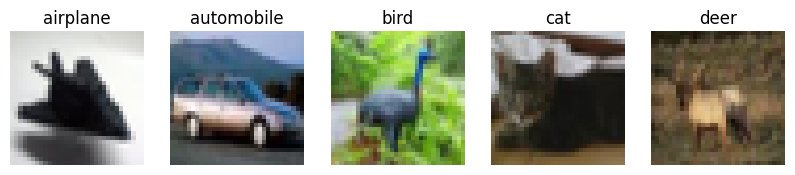

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 804ms/step - accuracy: 0.1157 - loss: 3.9401 - val_accuracy: 0.1000 - val_loss: 2.5150
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1456 - loss: 3.0910 - val_accuracy: 0.0400 - val_loss: 2.3842
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0704 - loss: 2.4962 - val_accuracy: 0.0400 - val_loss: 2.3657
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1156 - loss: 2.3517 - val_accuracy: 0.0600 - val_loss: 2.3189
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1101 - loss: 2.3078 - val_accuracy: 0.0400 - val_loss: 2.3268
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0475 - loss: 2.3290
Test accuracy: 0.0400
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Test Results:
Sample 1: True Label = 3, Predicted = 3
Sample 2: True Label = 8, Predicted = 1
Sample 3: True Label = 8, Predicted = 1
Sample 4: True Label = 0, Predicted = 1
Sample 5: True Label = 6, Predicted = 3
Accuracy on 5 samples: 0.

In [22]:
def main():
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # Create and train model
    model = create_resnet_model(num_classes=10)

    # Display output (before training to match sample output format)
    display_output(model, x_train, y_train)

    # Train
    history = train_model(model, x_train, y_train, x_test, y_test)

    # Evaluate
    evaluate_model(model, x_test, y_test)

    # Test
    test_model(model, x_test, y_test)

if __name__ == "__main__":
    main()